## k-최근접 이웃 회귀모델
##### - 분류 : 범주형 데이터를 기준으로 분류하는 방식
##### - 회귀 : 연속형 데이터(숫자)를 예측하는 방식
##### - 휘귀는 정해진 범주가 없으며 , 임의의 수치값을 출력합니다
#####
## k-최근접 이웃 알고리즘은 회귀에도 작동을 합니다.
##### - 작동방식..
##### - 분류와 유사, 예측하려는 데이터에 가장 가까운 이웃 갯수 선택
##### - 종석변수 target데이터가 연속형 데이터를 사용하여 임의 수치값 예측
#####
## 예측값 결정 방식
##### : 최근접 이웃의 갯수가 정해지면 ,이웃한 숫자값들의 "평균"을 계산하여
##### : 평균과 같거나 평균에 가장 근사한 값의 이웃 데이터가 예측값으로 결정됨
##### (일반 책에서 나오는 개념으로, 실제는 이웃데이터의 평균값이 나온다고 보시면 됩니다.)
##### 

In [3]:
import pandas as pd
import numpy as np
perch_length= np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [4]:
print(len(perch_length),len(perch_weight))
print(perch_length)
print(perch_weight)

# length (길이) : 특성 데이터(훈련데이터, train_data)
# weight (무게 ) : 특성 데이터 (훈련데이터, train_data)

56 56
[ 8.4 13.7 15.  16.2 17.4 18.  18.7 19.  19.6 20.  21.  21.  21.  21.3
 22.  22.  22.  22.  22.  22.5 22.5 22.7 23.  23.5 24.  24.  24.6 25.
 25.6 26.5 27.3 27.5 27.5 27.5 28.  28.7 30.  32.8 34.5 35.  36.5 36.
 37.  37.  39.  39.  39.  40.  40.  40.  40.  42.  43.  43.  43.5 44. ]
[   5.9   32.    40.    51.5   70.   100.    78.    80.    85.    85.
  110.   115.   125.   130.   120.   120.   130.   135.   110.   130.
  150.   145.   150.   170.   225.   145.   188.   180.   197.   218.
  300.   260.   265.   250.   250.   300.   320.   514.   556.   840.
  685.   700.   700.   690.   900.   650.   820.   850.   900.  1015.
  820.  1100.  1000.  1100.  1000.  1000. ]


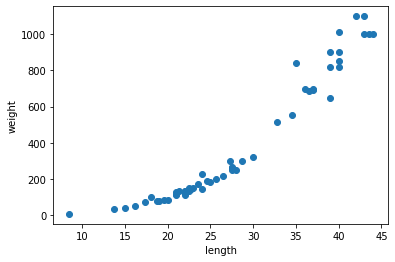

In [8]:
### 시각화를 통해 데이터의 형태 확인하기...
# - 산점도 시각화
import matplotlib.pyplot as plt
plt.scatter(perch_length,perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## (해석)
## x^2의 곡선그래프 형태의 비례관계
# x축 length(길이)가 길어지게 되면
# y축 weight(무게)가 커지는 현상을 보이고 있음
# 깊이는 무게와 연관성이 있으며
# 분포 형태는 선형에 가까우나, 조금 라운드가 있음
# 그러나 선형적 모델을 이용하여 분석을 실시 한 후
# 향후, 다항회귀모델을 통해 선형적 모델과 다항회귀모델의 검증결과를 통해
# 선택하고자 함.

## 훈련데이터와 테스트데이터 분류하기

In [15]:
# 함수 사용을 위해 불러오기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = \
train_test_split(perch_length, perch_weight, test_size=0.25, random_state=42)

In [16]:
test_target

array([   5.9,  100. ,  250. ,  130. ,  130. ,  820. ,  320. ,  188. ,
        900. ,  125. , 1000. ,   51.5,  250. ,  300. ])

## 2차원 데이터로 변환하기

In [23]:
data = [[leng, wei] for leng, wei in zip(train_input, test_input)]
data

[[19.6, 8.4],
 [22.0, 18.0],
 [18.7, 27.5],
 [17.4, 21.3],
 [36.0, 22.5],
 [25.0, 40.0],
 [40.0, 30.0],
 [39.0, 24.6],
 [43.0, 39.0],
 [22.0, 21.0],
 [20.0, 43.5],
 [22.0, 16.2],
 [24.0, 28.0],
 [27.5, 27.3]]

In [24]:
## train_input 과 test_input 훈련데이터만 2차원으로 만들면 됩니다.

In [25]:
## 차원 확인하기 : numpy 배열 속성에 있습니다.
# 샘플
test_array = np.array([1,2,3,4])
print(test_array)
print(test_array.shape)

[1 2 3 4]
(4,)


In [26]:
# 샘플 2행 2열로 만들기
print(test_array.reshape(2,2))
print(test_array.reshape(4,1))

[[1 2]
 [3 4]]
[[1]
 [2]
 [3]
 [4]]


In [29]:
# 1차원 데이터를 특정 행렬의 2차원으로 재성성할 때 사용하는 함수
# 보통 1차원을 2차원으로 만들대는 각행의 값이 차원이 됩니다.
# 즉, 각 행의 값이 배열(리스트) 1개라고 보시면 됩니다
# 1차원을 2차원으로 만들대는 첫번재 행은 전체 갯수, 두번재는 1이 됩니다.
# 전체 갯수를 모를 때는 -1 값을 사용하면 전체 행의 갯수를 체크합니다
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [31]:
print(train_input)
print('--------------')
print(test_input)

[[19.6]
 [22. ]
 [18.7]
 [17.4]
 [36. ]
 [25. ]
 [40. ]
 [39. ]
 [43. ]
 [22. ]
 [20. ]
 [22. ]
 [24. ]
 [27.5]
 [43. ]
 [40. ]
 [24. ]
 [21. ]
 [27.5]
 [40. ]
 [32.8]
 [26.5]
 [36.5]
 [13.7]
 [22.7]
 [15. ]
 [37. ]
 [35. ]
 [28.7]
 [23.5]
 [39. ]
 [21. ]
 [23. ]
 [22. ]
 [44. ]
 [22.5]
 [19. ]
 [37. ]
 [22. ]
 [25.6]
 [42. ]
 [34.5]]
--------------
[[ 8.4]
 [18. ]
 [27.5]
 [21.3]
 [22.5]
 [40. ]
 [30. ]
 [24.6]
 [39. ]
 [21. ]
 [43.5]
 [16.2]
 [28. ]
 [27.3]]


## k-최근접이웃 회귀 클래스(모델)생성

In [34]:
### 클래스(모델) 이름 : KNeighborsRegressor()
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr_model = knr.fit(train_input , train_target)

In [35]:
# 훈련모델 평가하기
knr.score(test_input, test_target)

0.992809406101064

In [38]:
### 훈련모델 평가하기
# 분류에서는 score의 결과값을 정확도라고 했다면
# 회귀에서는 결정계수(R^2)라는 용어를 사용합니다



### 회귀모델의 학습평가 결과 : 결정계수를 이용
# 회귀에서는 정확한 숫자를 맞히는 것은 불가능

### 결정계수의 범위
# - 0 - 1 사이의 값을 반환 받습니다.
# - 1에 가까울 수록 훈련이 잘된 모델이라고 판단하면 됩니다.
# - 보통 0.95이상을 좋다고 판단합니다. (기준은 아님...)

### 결정계수 공식
# 결정계수(R^2) = 1 - ((target - 예측)^2 의 합 / (target - 평균) ^ 2 의 합)
# - 예측값이 target값이 가까울 수록 분자값이 0에 가까워지며, 1에 가까워짐...

knr.score(test_input, test_target)


0.992809406101064

### 오차 확인하기
##### - 일반적으로 계산에 의한 결정계수값을 봐서는 오차가 어느정도인지 모릅니다
##### - 오차 값 확인이 필요합니다

In [39]:
### 오차를 확인하기 위해서는 예측을 먼저 선행해야 합니다.
test_prediction = knr.predict(test_input)
test_prediction

array([  60. ,   79.6,  248. ,  122. ,  136. ,  847. ,  311.4,  183.4,
        847. ,  113. , 1010. ,   60. ,  248. ,  248. ])

In [40]:
### 타깃값과 예측값 간의 오차를 확인하는 라이브러리 불러들이기
from sklearn.metrics import mean_absolute_error

In [43]:
### 오차값은 : 테스트 데이터에 대한 평균 절대값 오차를 계산합니다.
mae = mean_absolute_error(test_target, test_prediction)
mae

# (해석)
# 예측값이 평균적으로 19g 정도 타깃값과 차이가 있다는 것을 의미
# 차이 = 다르다는 의미는 아닙니다.

19.157142857142862

In [44]:
### 테스트 결정계수
knr.score(test_input, test_target)

0.992809406101064

In [45]:
### 훈련 결정계수
knr.score(train_input, train_target)

0.9698823289099254

## 과대적합 vs 과소적합
##### - 훈련데이터와 테스트데이터를 각각 평가하여 비교 했을 떄...
##### 1. 과대적합 : 훈련데이터의 평가결과가 너무 높고, 테스트데이터의 평가가 너무 낮을 경우
##### 2. 과소적합 : 훈련데이터의 평가결과가 낮고, 테스트데이터의 평가가 높은 경우
#####
## 과소적합이 발생하는 이유?
##### - 사용된 전체 데이터의 갯수가 너무 작은 경우에 주로 발생합니다.
##### - 데이터가 작으면 테스트데이터가 훈련데이터의 특징을 잘 따르지 못하는 경우가 발생.

In [46]:
### 과소적합 최소 방법
# - 훈련모델을 복잡하게 만들어서 평가결과를 높일 수 있음

### 모델을 복잡하게 만드는 방법
# - 이웃의 갯수를 작게하면 됩니다.
# - 이웃의 갯수가 작아지면 , 이웃의 비교 대상이 조금 더 압축되기 때문에
# - 훈련의 집중도가 높아집니다 . 정확도가 높아집니다.

### 이웃의 갯수 : 기본5개
# - 복잡도를 높이는 방법은 이웃의 갯수를 줄여나가는 방법 입니다.

In [55]:
# 이웃의 개수는 홀수로 써야함 최소 3이상의 홀수
knr = KNeighborsRegressor(n_neighbors = 3)
knr_model = knr.fit(train_input , train_target)
test_prediction = knr.predict(test_input)
test_prediction
# 테스트데이터 평가
print(knr.score(test_input, test_target))
# 훈련데이터 평가
print(knr.score(train_input, train_target))

0.9746459963987609
0.9804899950518966
